**Part 1: Data Loading and Preprocessing**

1. Load the Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('onlinefoods.csv')
print(data.head())

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

2. Handle Missing Values

In [ ]:
print(data.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


3. Encode Categorical Variables

In [ ]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation', 'Educational Qualifications', 'Output', 'Feedback'])
data_dummies = pd.get_dummies(data, drop_first = True)
print(data_encoded)

     Age  Monthly Income  Family size  latitude  longitude  Pin code  \
0     20       No Income            4   12.9766    77.5993    560001   
1     24  Below Rs.10000            3   12.9770    77.5773    560009   
2     22  Below Rs.10000            3   12.9551    77.6593    560017   
3     22       No Income            6   12.9473    77.5616    560019   
4     22  Below Rs.10000            4   12.9850    77.5533    560010   
..   ...             ...          ...       ...        ...       ...   
383   23       No Income            2   12.9766    77.5993    560001   
384   23       No Income            4   12.9854    77.7081    560048   
385   22       No Income            5   12.9850    77.5533    560010   
386   23  Below Rs.10000            2   12.9770    77.5773    560009   
387   23       No Income            5   12.8988    77.5764    560078   

    Unnamed: 12  Gender_Female  Gender_Male  Marital Status_Married  ...  \
0           Yes              1            0                

4. Feature Selection

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['review'] = (data['Feedback'] == "Positive").astype(bool)

x = data_dummies.drop(['Age', 'Family size', 'latitude', 'longitude', 'Pin code'], axis=1)
y = data_dummies['review']

**Part 2: Exploratory Data Analysis (EDA)**

1. Descriptive Statistics

In [ ]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


- I found it interesting that the average family size is only 3 people, and that the average age of the demographic is 24 years old, making the demographic relatively young, especially since there is only one 18-year old person.

2. Visualization


*   Distribution of Age and its impact on Feedback


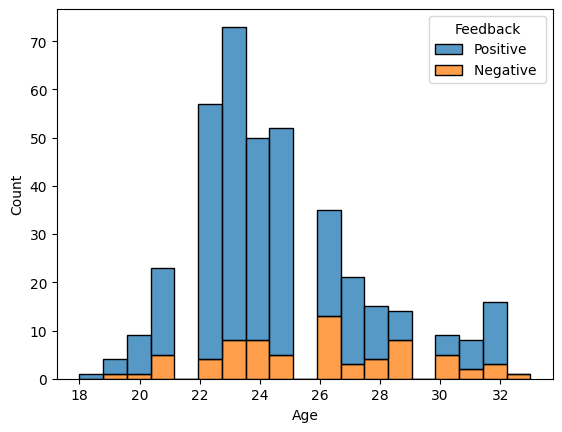

In [ ]:
sns.histplot(data = data, x='Age', hue='Feedback', multiple='stack')
plt.show()

*   Proportions of Feedback across different levels of Monthly Income

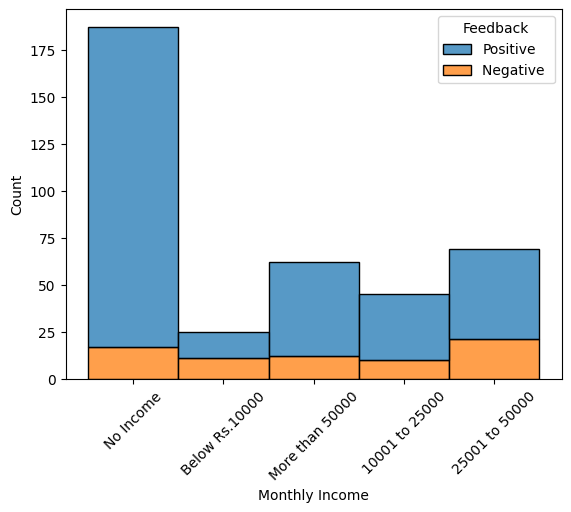

In [ ]:
sns.histplot(data = data, x='Monthly Income', hue='Feedback', multiple='stack')
plt.xticks(rotation=45)
plt.show()

3. Correlation matrix heatmap to identify any interesting correlations between features

<ipython-input-47-decbdaf04d3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="rocket", annot=True)


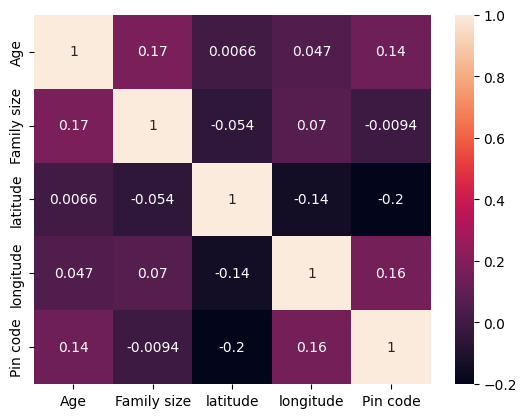

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="rocket", annot=True)
plt.show()

**Part 3: Logistic Regression Model**

1. Build the Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=80)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

2. Model Evaluation

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: ")
print(conf_matrix)
print(f"Classification Report: ")
print(class_report)

Accuracy: 1.0
Confusion Matrix: 
[[16  0]
 [ 0 62]]
Classification Report: 
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        16
        True       1.00      1.00      1.00        62

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



- The accuracy achieved a solid 1.0 for the prediction, meaning it correctly predicted every instance. It's not even just the accuracy, the precision, recall and in turn, the f1-score are all 1.0, meaning, a near flawless prediction rate. It correctly predicted all 16 of the truly negative instances, and all 62 of all the truly positive ones, meaning, no false positives or negatives, no errors in prediction were made.

**Part 4: Data Analysis and Visualization**

1. Feature Importance

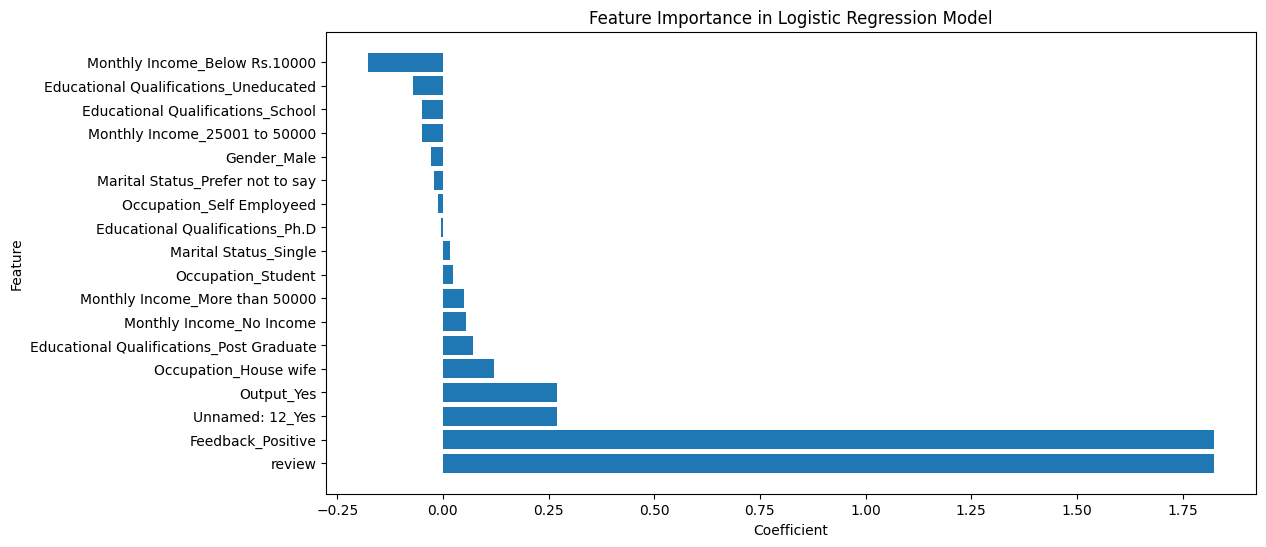

In [ ]:
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': x.columns,'Coefficient': coefficients})

feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()

Basically, if the feature's coefficients return a negative value, they are less likely to influenve feeedback, and the higher the coefficient, the likely they are to influenve feedback. This already gives us an idea about the demographic who are part of the dataset.

People Who Are Less Likely to Leave a Positive Feedback
- People with a monthly income below Rs. 10000 are the least likely to leave a positive feedback, next is people who are uneducated, next is people whose educational qualifications is only school, next is people whose monthly income are between Rs. 25001 and Rs. 50000, next is people who are male, next is people whose marital status are not known, next is people who are self-employed, and lastly, people who have PhDs.

People Who Are Likely to Leave a Positive Feedback
- The first group of people who are single, next is people who are currently students, next is people who earn more than Rs. 50000 monthly, next is people who earn no income at all, next is people who are post-graduates, next is people who are housewives, next is the output being a yes, and people whose feedback is positive because of course, it would correlate highly to feedback.

Looking at the results, it's interesting to see how financial situation, educational attainment, and occupation really affect how people leave feedback on their food. One notable example is how people are earn no income monthly are much more likely to influence the feedback than people who earn less than Rs. 10000, or how people who are housewives are more likely to influence feedback compared to people who are self-employed.

2. Prediction Insights

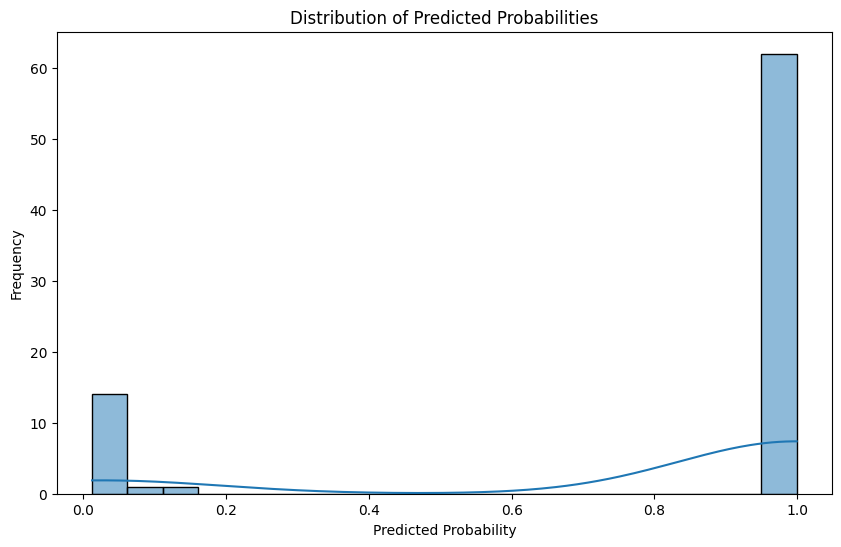

In [ ]:
y_pred_prob = model.predict_proba(x_test_scaled)[:,1]

plt.figure(figsize=(10,6))
sns.histplot(y_pred_prob, bins = 20, kde = True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()

The graph looks fairly accurate as to how the accuracy and the confusion matrix turned out. Around 12 instances are considered near zero, so they can be considered as negative instances that were identified, and 62 instances are exactly at 1.0, meaning they are perfectly accurately iddentified positive instances. There are a couple of outliers shown in the graph that aren't in the accuracy and confusion matrix, but they aren't really making any big changes to the overall predicted probability.